<a href="https://colab.research.google.com/github/soumitkundu/SIG742-EndTermAssignment/blob/main/SIG742Task2-Group-13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student ID:** _225738919_

**Student Name:** _Soumit Kundu_

**Workshop / Lab Session Time:** Mon / Tue / Wed / Thu / Fri

# Part 1: **Data Acquisition and Manipulation**

The (business_review_submission.zip) data used for this part could be found in [here](https://github.com/tulip-lab/sit742/blob/develop/Jupyter/data/business_review_submission.zip). There are two files in the data. The first one is about the business review submission with many companies. For each of the row, the review submission is provided with relevant information such as user id, time, name and many others. The second one is the meta information of the business and the two data could be joined with gmap_id. You will need to use spark to **first read the unzipped (csv) review data for starting** and later join the meta review business data on dataframe (pandas or spark). You could find the code on reading csv data with Spark from [M04G](https://github.com/tulip-lab/sit742/blob/develop/Jupyter/M04-DataManipulation/M04G-SparkSQL.ipynb). In some of the tasks, if the question is not specifically asking to use spark, you could use both pandas and numpy.

### Answer 1.1

**Question:**

Using PySpark to do some data wrangling process, so that:
> **1.1.1** For the none or null in text column, change it to 'no review'.

> **1.1.2** Process the content in time column, and convert the strings from time to yyyy-mm-dd format in the new column as newtime and show the first 5 rows.

**Installing Required Libraries**

In [1]:
#update local version of the package catalog
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.3.3
# !wget -q https://archive.apache.org/dist/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
# # unzip it
# !tar xf spark-3.3.3-bin-hadoop3.tgz
# install findspark
!pip install -q findspark

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,064 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,807 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [

In [2]:
import os

import findspark
findspark.init()

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pyspark
pyspark.__version__

'3.5.1'

In [4]:
# Importing spark sql functions
from pyspark.sql.functions import *

In [5]:
# Importing SparkSession as our Spark version is 3.5.1
from pyspark.sql import SparkSession

# Initializing SparkSession and crearing the app
spark = SparkSession.builder.appName('SIG742').getOrCreate()
spark

In [6]:
# connect to google colab drive
from google.colab import drive
drive.mount("/content/gdrive")

# Initializing folder path where our datasets are stored
drive_path = '/content/gdrive/MyDrive/MDS-Datasets/SIG742/business_review_submission'

Mounted at /content/gdrive


In [7]:
# Reading the review dataset
df_review = spark.read.csv(drive_path + "/review.csv", header=True)
df_review

DataFrame[user_id: string, name: string, time: string, rating: string, text: string, pics: string, resp: string, gmap_id: string]

In [8]:
df_review.show(5)

+--------------------+--------------------+-------------+--------------------+--------------------+----+----+--------------------+
|             user_id|                name|         time|              rating|                text|pics|resp|             gmap_id|
+--------------------+--------------------+-------------+--------------------+--------------------+----+----+--------------------+
|1.091298048426862...|          Nicki Gore|1566331951619|                   5|We always stay he...|NULL|NULL|0x56b646ed2220b77...|
|1.132409264057589...|       Allen Ratliff|1504917982385|                   5|Great campground ...|NULL|NULL|0x56b646ed2220b77...|
|1.130448378911412...|   Jonathan Tringali|1474765901185|                   4|We tent camped he...|NULL|NULL|                NULL|
|There is a bath h...| 2 restrooms (sin...|       toilet| shower). The hot...| but they lack ve...|NULL|NULL|                NULL|
|Wi-Fi didn't reac...|                NULL|         NULL|0x56b646ed2220b77...|     

**1.1.1** For the none or null in text column, change it to 'no review'.

In [9]:
null_review_count = df_review.filter(col('text').isNull()).count()
print(f"None or Null count for the 'text' column is: {null_review_count}")

None or Null count for the 'text' column is: 249931


In [10]:
df_review_filtered = df_review.fillna('no review', subset=['text'])

In [11]:
no_review_count = df_review_filtered.filter(df_review_filtered['text'] == 'no review').count()
print(f"Count of 'no review' is: {no_review_count}")

Count of 'no review' is: 249931


**1.1.2** Process the content in time column, and convert the strings from time to yyyy-mm-dd format in the new column as newtime and show the first 5 rows.

In [12]:
df_converted = df_review_filtered.withColumn(
    'newtime',
    to_date(from_unixtime(col('time').cast('bigint') / 1000))
)
df_converted.show(5)

+--------------------+--------------------+-------------+--------------------+--------------------+----+----+--------------------+----------+
|             user_id|                name|         time|              rating|                text|pics|resp|             gmap_id|   newtime|
+--------------------+--------------------+-------------+--------------------+--------------------+----+----+--------------------+----------+
|1.091298048426862...|          Nicki Gore|1566331951619|                   5|We always stay he...|NULL|NULL|0x56b646ed2220b77...|2019-08-20|
|1.132409264057589...|       Allen Ratliff|1504917982385|                   5|Great campground ...|NULL|NULL|0x56b646ed2220b77...|2017-09-09|
|1.130448378911412...|   Jonathan Tringali|1474765901185|                   4|We tent camped he...|NULL|NULL|                NULL|2016-09-25|
|There is a bath h...| 2 restrooms (sin...|       toilet| shower). The hot...| but they lack ve...|NULL|NULL|                NULL|      NULL|
|Wi-Fi

### Answer 1.2

**Question:**

Find out the information for gmap_id on the reviews. In order to achieve the above, some wrangling work is required to be done:
> **1.2.1** Using pyspark to calculate the number of reviews per each unique gmap_id and save as float format in pyspark dataframe to show the top 5 rows.

> **1.2.2** Transform the current pyspark dataframe to pandas dataframe (named as df) and create the column reivew_time with the information of review time on hours level. Print your df pandas dataframe with top 5 rows after creating the column review_time.

> **1.2.3** Using matplotlib or seaborn to draw some (two or more if possible) visualizations on the relationship between gmap_id and reivew_time. You could explore for example, what is the time people usually review? How many business is reviewed in the morning time etc. Please also discuss the insights you are finding with your visualizations in the markdown cell. Please also include your findings and visualizations in the report.

**1.2.1** Using pyspark to calculate the number of reviews per each unique gmap_id and save as float format in pyspark dataframe to show the top 5 rows.

In [13]:
gmap_wise_reviews = df_converted.groupBy("gmap_id")\
    .agg(countDistinct("text")\
    .cast("float").alias("gmap_id_unique_reviews"))\
    .orderBy(col("gmap_id_unique_reviews").desc())

gmap_wise_reviews.show(5)

+--------------------+----------------------+
|             gmap_id|gmap_id_unique_reviews|
+--------------------+----------------------+
|                NULL|               17910.0|
|0x56c897b9ce6000d...|                1516.0|
|0x56c8965ee2fb87a...|                 979.0|
|0x56c899d05892048...|                 943.0|
|0x56c897c63697ee3...|                 935.0|
+--------------------+----------------------+
only showing top 5 rows



**1.2.2** Transform the current pyspark dataframe to pandas dataframe (named as df) and create the column reivew_time with the information of review time on hours level. Print your df pandas dataframe with top 5 rows after creating the column review_time.

In [15]:
# Convert Unix timestamp (milliseconds) to seconds and then to datetime
df_converted = df_converted.withColumn("reivew_datetime", from_unixtime(col("time").cast('bigint') / 1000))

# Extract hour from the converted datetime
df_converted = df_converted.withColumn("reivew_time", hour(col("reivew_datetime")))

# Convert to Pandas DataFrame
df = df_converted.toPandas()

# Print top 5 rows from the Pandas DataFrame
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,newtime,reivew_datetime,reivew_time
0,1.091298048426862e+20,Nicki Gore,1566331951619,5,We always stay here when in Valdez for silver ...,None,None,0x56b646ed2220b77f:0xd8975e316de80952,2019-08-20,2019-08-20 20:12:31,20.0
1,1.1324092640575896e+20,Allen Ratliff,1504917982385,5,Great campground for the price. Nice hot unlim...,None,None,0x56b646ed2220b77f:0xd8975e316de80952,2017-09-09,2017-09-09 00:46:22,0.0
2,1.1304483789114126e+20,Jonathan Tringali,1474765901185,4,We tent camped here for 2 nights while explori...,None,None,None,2016-09-25,2016-09-25 01:11:41,1.0
3,There is a bath house with 1 set of coin opera...,2 restrooms (sink toilet) and 2 shower rooms ...,toilet,shower). The hot water will run out after a f...,but they lack vent fans to remove moisture so...,None,None,None,None,None,NaN
4,Wi-Fi didn't reach our site on the back edge o...,None,None,0x56b646ed2220b77f:0xd8975e316de80952,no review,None,None,None,None,None,NaN


**1.2.3** Using matplotlib or seaborn to draw some (two or more if possible) visualizations on the relationship between gmap_id and reivew_time. You could explore for example, what is the time people usually review? How many business is reviewed in the morning time etc. Please also discuss the insights you are finding with your visualizations in the markdown cell. Please also include your findings and visualizations in the report.

In [16]:
hour_wise_reviews = df['reivew_time'].value_counts().to_frame().reset_index().rename(columns={'count': 'reviews'})
hour_wise_reviews = hour_wise_reviews.sort_values(by='reivew_time').reset_index(drop=True)
hour_wise_reviews.head()

,reivew_time,reviews
0,0.0,31434
1,1.0,31447
2,2.0,33849
3,3.0,35498
4,4.0,35634


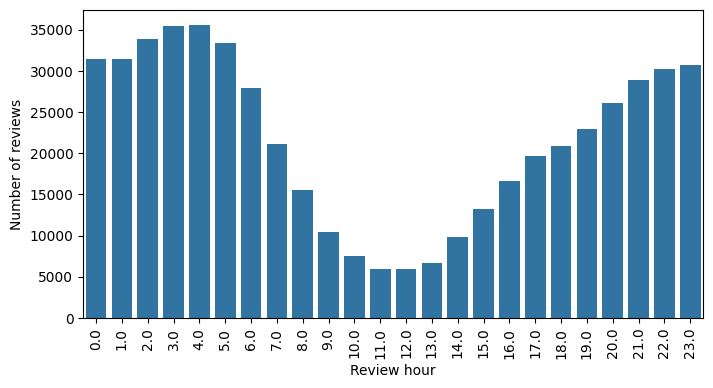

In [17]:
plt.figure(figsize=[8, 4])
sns.barplot(hour_wise_reviews, x='reivew_time', y='reviews')
plt.xlabel("Review hour")
plt.ylabel("Number of reviews")
plt.tick_params(axis='x', labelrotation=90)

### Answer 1.3

**Question:**

Let’s continue to analyze the reivew_time with reviews and related gmap_id. You need to use another data meta-business to join with the current dataframe on gmap_id.
> **1.3.1** Determine which workday (day of the week), generates the most reviews (plotting the results in a line chart with workday on averaged submissions).

> **1.3.2** Identify the names of business (column name from data meta-business) that has the highest averaged ratings on ‘that workday’ (you need to find out from 1.3.1), and find out which category those businesses are from?

> **1.3.3** Please further explore the data on name of business and find out some more insights by yourself such as which category it is and what are the peak hours etc. Please use visualizations and tables to support your findings and write down the insights in the markdown cell. Please also include your findings and visualizations in the report.

**Answer 1.3:**

Let’s continue to analyze the reivew_time with reviews and related gmap_id. You need to use another data meta-business to join with the current dataframe on gmap_id.

In [18]:
df_meta_business = pd.read_csv(drive_path + "/meta-review-business.csv")
df_meta_business.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Bear Creek Cabins & RV Park,"Bear Creek Cabins & RV Park, 3181 Richardson H...",0x56b646ed2220b77f:0xd8975e316de80952,NaN,61.100644,-146.214552,"['RV park', 'Cabin rental agency', 'Campground']",4.5,18,NaN,NaN,NaN,NaN,"['0x56b6445fd9f9e387:0x6dd3d374ef56431a', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
1,Anchorage Market,"Anchorage Market, 88th Ave, Anchorage, AK 99515",0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,61.141435,-149.868482,"[""Farmers' market""]",4.2,18,NaN,"[['Thursday', 'Closed'], ['Friday', '10AM–5PM'...","{'Service options': ['In-store shopping'], 'Ac...",Closed ⋅ Opens 10AM Fri,NaN,https://www.google.com/maps/place//data=!4m2!3...
2,Happy Camper RV,"Happy Camper RV, 1151 N Shenandoah Dr # 4, Pal...",0x56c8e0455225be87:0xf24828df75e2f8ae,NaN,61.591856,-149.290657,['RV repair shop'],4.4,28,NaN,NaN,{'Accessibility': ['Wheelchair accessible entr...,NaN,"['0x56c8e104d9929a1d:0x2070ad63defadbf', '0x56...",https://www.google.com/maps/place//data=!4m2!3...
3,Cajun Corner,"Cajun Corner, 302 G St, Anchorage, AK 99501",0x56c8bdb5d91017cd:0xca19fd9afceed343,NaN,61.219378,-149.895852,['American restaurant'],4.5,24,NaN,"[['Wednesday', '11AM–2PM'], ['Thursday', '11AM...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM Thu,NaN,https://www.google.com/maps/place//data=!4m2!3...
4,Alaska General Seafoods,"Alaska General Seafoods, 980 Stedman St, Ketch...",0x540c251956395673:0x16f5a4fe26c18931,NaN,55.336119,-131.630669,"['Seafood wholesaler', 'Food']",4.7,8,NaN,"[['Wednesday', '7AM–11PM'], ['Thursday', '7AM–...",NaN,Open ⋅ Closes 11PM,"['0x540c25a882a72685:0xac5663d19d0a1893', '0x5...",https://www.google.com/maps/place//data=!4m2!3...


In [19]:
# Merge the two DataFrames
df_business_reviews = pd.merge(df, df_meta_business, on='gmap_id', how='inner')
df_business_reviews.head()

,user_id,name_x,time,rating,text,pics,resp,gmap_id,newtime,reivew_datetime,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.091298048426862e+20,Nicki Gore,1566331951619,5,We always stay here when in Valdez for silver ...,None,None,0x56b646ed2220b77f:0xd8975e316de80952,2019-08-20,2019-08-20 20:12:31,...,-146.214552,"['RV park', 'Cabin rental agency', 'Campground']",4.5,18,NaN,NaN,NaN,NaN,"['0x56b6445fd9f9e387:0x6dd3d374ef56431a', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
1,1.091298048426862e+20,Nicki Gore,1566331951619,5,We always stay here when in Valdez for silver ...,None,None,0x56b646ed2220b77f:0xd8975e316de80952,2019-08-20,2019-08-20 20:12:31,...,-146.214552,"['RV park', 'Cabin rental agency', 'Campground']",4.5,18,NaN,NaN,NaN,NaN,"['0x56b6445fd9f9e387:0x6dd3d374ef56431a', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
2,1.1324092640575896e+20,Allen Ratliff,1504917982385,5,Great campground for the price. Nice hot unlim...,None,None,0x56b646ed2220b77f:0xd8975e316de80952,2017-09-09,2017-09-09 00:46:22,...,-146.214552,"['RV park', 'Cabin rental agency', 'Campground']",4.5,18,NaN,NaN,NaN,NaN,"['0x56b6445fd9f9e387:0x6dd3d374ef56431a', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
3,1.1324092640575896e+20,Allen Ratliff,1504917982385,5,Great campground for the price. Nice hot unlim...,None,None,0x56b646ed2220b77f:0xd8975e316de80952,2017-09-09,2017-09-09 00:46:22,...,-146.214552,"['RV park', 'Cabin rental agency', 'Campground']",4.5,18,NaN,NaN,NaN,NaN,"['0x56b6445fd9f9e387:0x6dd3d374ef56431a', '0x5...",https://www.google.com/maps/place//data=!4m2!3...
4,1.1032915514759202e+20,S Blad,1472858535682,4,"This place is just a few miles outside Valdez,...",None,None,0x56b646ed2220b77f:0xd8975e316de80952,2016-09-02,2016-09-02 23:22:15,...,-146.214552,"['RV park', 'Cabin rental agency', 'Campground']",4.5,18,NaN,NaN,NaN,NaN,"['0x56b6445fd9f9e387:0x6dd3d374ef56431a', '0x5...",https://www.google.com/maps/place//data=!4m2!3...


**1.3.1** Determine which workday (day of the week), generates the most reviews (plotting the results in a line chart with workday on averaged submissions).

In [20]:
# extract workday
df_business_reviews['newtime'] = pd.to_datetime(df_business_reviews['newtime'])
df_business_reviews['workday'] = df_business_reviews['newtime'].dt.day_name()
df_business_reviews['workday']

,workday
0,Tuesday
1,Tuesday
2,Saturday
3,Saturday
4,Friday
...,...
499275,Thursday
499276,Wednesday
499277,Thursday
499278,Saturday


### Answer 1.4

**Question:**

For the reviews on each of the submissions, work on all the review content and find out the top 30 most common words; Also generate separate word cloud visualizations for different years by grouping the reviews by review year and write down the insights in the markdown cell. Please also include your findings and visualizations in the report.

### Answer 1.5

**Question:**

Let’s do some analysis on the business_name and the reviewers. Determine the number of unique reviewers of business and its categories to identify which business / category has attracted the most reviewers (find out the highest distinct count of reviewers on business / category level). Also, analyze the temporal patterns of when reviewers submitted their reviews (you could leverage the workday, year, month, or hours to conduct the analysis) and share your findings and insights in the markdown cell. Please also include your findings and insights (visualizations) in the report.

### Answer 1.6

**Question:**

As the data scientist, you are required to build a recommendation for the business by using reviews, ratings, and its categories. In this task, you need to:
> **1.6.1** Write down your strategy of building the recommendation on business for customers in the markdown cell. You could create your own strategy or leverage the provided one here KNN on collaborative filtering. Please also include your strategy details in the report.

> **1.6.2** Could you please try to implement the strategy (code) you have written down for the recommendation system? Please give detailed explanation of your code and the logic in the comments and also interpret the recommendations with examples in the markdown cell. Please also include your implementation details and results in the report.

### Answer 1.7

**Question:**

Continue work on the review data you have now, for each of the submissions of the review, you will need to explore the rating with other information:
> **1.7.1** Build visualization to explore the relationships of the rating and business categories. Please write down your insights in the markdown cell and also include your insights and visualizations in the report.

> **1.7.2** Let’s focus on the lower ratings now. Could you please find out the actual reviews on lower ratings and analyze on the reason? (You could use the common used words in lower rating reviews or design your own strategy with reasonable logic). Please also include your analysis details in the report.

### Answer 1.8

**Question:**

Continue to work on the submission of the reviews, we would like to focus on the reviewer level with all the reviewed business history, but before we actually conduct the programming, we will need to finish few questions for exploration:
> **1.8.1** Check on the reviewer level reviewed business, sort the review of each business by the review time (newtime column) and then save the business name into the list variable user_business_list for each reviewer.

> **1.8.2** Check on the user_business_list, could you observe some repeated business names for the same user? If so, could you remove those duplicated business names under same user? Please print out the number of element in the user_business_list for each reviewer before removing the duplicated business name and after removing the duplicated business name.

> **1.8.3** Check on the user_business_list, could you find the user similarities according to their past reviewed business ? You are free to design your own strategy and give sufficient explanation in markdown cell and code implementation together. Please also include your strategy details and implementation in the report.

_Hint: you might consider to use encoding for each of the business names and then calculate the difference of the users._

# Part II: **Submission Prediction**

### Answer 2.1

**Question:**

In this question, we will focus only on two information: total reviews per day with review time (newtime from the dataframe) to form the review volume time series. You are required to explore the review time series. There are some days not available in the review time series. Please add those days into the review time series with default number of review with the mean value of the number of review per day in the whole data (without any filtering on reviews). After that, decompose the submission review time series with addictive mode and analyses on the results to find if there is any seasonality pattern (you could leverage the M05A material from lab session with default setting in seasonal_decompose function). Please also include your analysis details and implementation in the report.

### Answer 2.2

**Question:**

We will try to use time series model ARIMA for forecasting the future. You need to find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Absolute Error from 27 choices (you might need to split the time series to train and test with yourself with grid search according to the M05B material). Also, you are required to discuss with your group member on exploring the deep learning time series forecasting methods such as LSTM and RNN. Please write down your discussion around the necessary data wrangling and modeling steps (steps on how to achieve, not actual code). Also please give the reference of the deep learning time series forecasting models you are using. Please also include your discussion details and implementation in the report.

**Question:**

In this question, you are provided with the PDF file by Universities Australia via Indigenous Strategy annual report. You are required to critically analyze this report using your data science skills.
> **Data Extraction** Carefully review the PDF and identify all relevant quantitative data, tables, and figures that can be extracted or digitized; Present any extracted data in a structured format (e.g., CSV, Excel table, or DataFrame);

> **Data Analysis** Utilize your data analytics skills to discover common patterns or trends from the report; Where possible, compare trends over multiple years, between institutions, or across different Indigenous strategy metrics.

> **Insights** Provide a clear and concise summary of the main patterns, trends, or correlations discovered from your analysis; Interpret what these findings reveal about the progress and challenges of Indigenous strategies in Australian universities.

_You may use any data analytics tools or libraries you are comfortable with. All steps, from extraction to insights, should be clearly documented in your SIT742Task2Report.pdf, and source code should be in SIT742Task2Code.ipynb._

# Part III: **Optional: Questionnaire on Integrating Indigenous Perspectives into DS Education**

**Note:** This part of the assignment is **optional** and carries **no mark**.

In modern data-driven environments, collaboration often involves individuals from diverse cultural and social backgrounds. As part of our ongoing efforts to develop inclusive and socially responsible unit, we are exploring ways to meaningfully integrate Australian Indigenous perspectives into Data Science education, specifically in the context of the unit SIT742: Modern Data Science. We invite you to share your thoughts and feedback on this important topic. Your input will help us improve the quality and inclusiveness of both the unit and its associated learning materials.
If you are willing to assist, please consider completing a short questionnaire titled Integrating Indigenous Perspectives into Data Science Education, which can be accessed at the following link:
- [POST-Survey Questionnaire](https://researchsurveys.deakin.edu.au/jfe/form/SV_3dZpMmkbdjsKkaq)

(Please interpret its references to “ICT” as also including Data Science.)

#### Related Information
**Human Research Ethics Application ID:** 2025/HE000518 Approval Date: 28/04/2025 Estimated Time to Complete: Approximately 10 minutes

**Confidentiality:** All responses are strictly confidential and will be used solely for research and educational improvement purposes.

**University Policy** Deakin Indigenous Strategy 2023-2028